In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [3]:
csv_path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%204/Datasets/TopSellingAlbums.csv'
df = pd.read_csv(csv_path)

# Visualizations

## Univariate Analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format 
plt.rcParams['figure.figsize'] = (16,8)

## Bi-Variate Analysis

In [7]:
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import warnings
warnings.simplefilter('ignore')

In [8]:
iris = datasets.load_iris()
iris_pd = pd.DataFrame(iris.data)
iris_pd.columns = iris.feature_names
iris_pd["Class"] = iris.target
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target

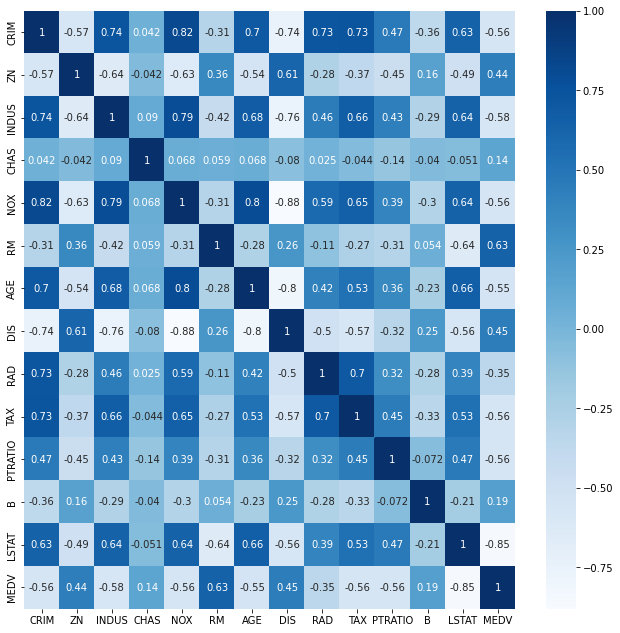

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) 
sns.heatmap(boston_pd.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

In [10]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
X = boston_pd.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,CRIM,2.10
1,ZN,2.84
2,INDUS,14.49
3,CHAS,1.15
4,NOX,73.89
...,...,...
8,RAD,15.17
9,TAX,61.23
10,PTRATIO,85.03
11,B,20.10


In [11]:
print("Datatypes of IRIS Dataset")
iris_pd.dtypes

Datatypes of IRIS Dataset


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object

In [12]:
iris_pd['petal width (cm)'].describe()

count   150.00
mean      1.20
std       0.76
min       0.10
25%       0.30
50%       1.30
75%       1.80
max       2.50
Name: petal width (cm), dtype: float64

In [13]:
bin_label = ['LOW','HIGH']
iris_pd['Bin_Petal_Width'] = pd.qcut(iris_pd['petal width (cm)'],q=[0,0.5,1],labels=bin_label)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.10,3.50,1.40,0.20,0,LOW
1,4.90,3.00,1.40,0.20,0,LOW
2,4.70,3.20,1.30,0.20,0,LOW
3,4.60,3.10,1.50,0.20,0,LOW
4,5.00,3.60,1.40,0.20,0,LOW


In [14]:
iris_pd['Bin_Petal_Width'].value_counts()

LOW     78
HIGH    72
Name: Bin_Petal_Width, dtype: int64

In [15]:
bin_label = ['LOW','HIGH']
iris_pd['Bin_Petal_Width'] = pd.qcut(iris_pd['petal width (cm)'],q=[0,0.5,1],labels=bin_label)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.10,3.50,1.40,0.20,0,LOW
1,4.90,3.00,1.40,0.20,0,LOW
2,4.70,3.20,1.30,0.20,0,LOW
3,4.60,3.10,1.50,0.20,0,LOW
4,5.00,3.60,1.40,0.20,0,LOW


In [16]:
iris_pd['Bin_Petal_Width'].value_counts()

LOW     78
HIGH    72
Name: Bin_Petal_Width, dtype: int64

In [17]:
contingency_table = pd.crosstab(iris_pd['Bin_Petal_Width'],iris_pd['Class'])
print(contingency_table)

Class             0   1   2
Bin_Petal_Width            
LOW              50  28   0
HIGH              0  22  50


In [18]:
from scipy import stats
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_table)
print("CHI-SQUARE TEST VALUES")
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val)
print("Contigency Table")
ex

CHI-SQUARE TEST VALUES
Chi Square Value :  100.64102564102565
Degree of Freedom :  2
P Value :  1.3998417931687032e-22
Contigency Table


array([[26., 26., 26.],
       [24., 24., 24.]])

# Multi-Variate Analysis

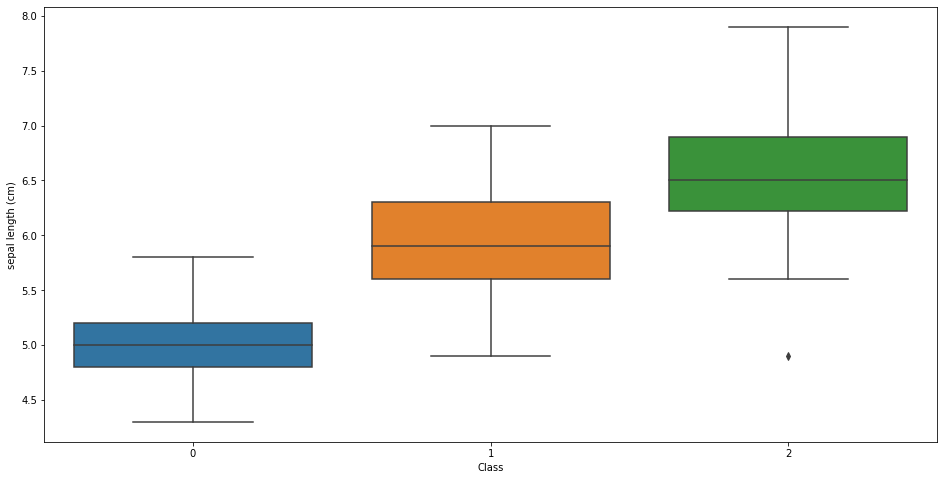

In [20]:
sns.boxplot(x = 'Class', y = 'sepal length (cm)', data = iris_pd)

In [21]:
import pandas
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Geography')

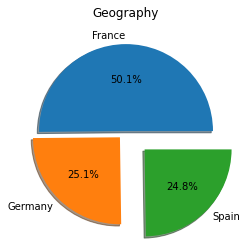

In [ ]:
plt.pie(data.Geography.value_counts(),[0,0.1,0.3],shadow=True,labels=['France','Germany','Spain'],autopct="%1.1f%%")
plt.title('Geography')

# Descriptive statistics on the dataset

In [24]:
import pandas
import matplotlib.pyplot as plt

In [25]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pandas.read_csv(url, names=names)

In [26]:
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


In [28]:
data.shape

(768, 9)

# Handling the missing data and outliers

In [30]:
import numpy as np
import pandas as pd

In [31]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [32]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
70.6 ms ± 8.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

dtype = int
2.23 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [34]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [35]:
1 + np.nan

nan

In [36]:
0 *  np.nan

nan

# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [40]:
import pandas as pd
import numpy as np

In [42]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [43]:
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


# One hot encoding

In [45]:
from numpy import argmax
data = 'hello world'
print(data)
print()

hello world



In [46]:
alphabet = 'abcdefghijklmnopqrstuvwxyz '
print(list(enumerate(alphabet)))
print()

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j'), (10, 'k'), (11, 'l'), (12, 'm'), (13, 'n'), (14, 'o'), (15, 'p'), (16, 'q'), (17, 'r'), (18, 's'), (19, 't'), (20, 'u'), (21, 'v'), (22, 'w'), (23, 'x'), (24, 'y'), (25, 'z'), (26, ' ')]



In [47]:
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
print()

[7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]



In [48]:
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [49]:
inverted = int_to_char[argmax(onehot_encoded[0])]
print(inverted)

h


# Spilting of data for Training and Testing

# Dependent variable

In [51]:
pvals= [.001, .003, .006, .084, .013, .34]
import statsmodels.stats.multitest as smm 
smm.multipletests(pvals, alpha=.01, method='fdr_bh')

(array([ True,  True, False, False, False, False]),
 array([0.006 , 0.009 , 0.012 , 0.1008, 0.0195, 0.34  ]),
 0.0016736538523104416,
 0.0016666666666666668)

# independent variable

In [56]:
from sklearn.linear_model import LinearRegression

# Scaling

In [57]:
from sklearn.preprocessing import scale

In [58]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03


# Train Test Split

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
                                                   

In [71]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=122)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 2 0 1 2 0 1 2 0 1 1 2 2 1 0 0 2 0 2 0 1 1 0 2 2 1 2 1 0 2 0 2 0 1 2 1
 2 1 2 0 2 0 0 1 1 0 1 2 2 0 2 2 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 2 0 2 0 1 1
 2]
[0 2 1 1 2 0 1 0 2 1 2 2 0 2 0 2 2 1 1 1 2 1 1 0 2 1 0 0 1 2 0 1 1 1 2 0 2
 1 2 0 2 0 2 0 1 1 0 1 2 0 0 2 1 1 2 0 1 0 0 1 2 0 2 1 2 2 0 1 2 0 0 2 1 2
 2]


In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]
